# Génération d'une base données selon la mises en situation

In [1]:
import numpy as np
import pandas as pd

# Définition des paramètres de simulation
np.random.seed(42)  # Pour la reproductibilité
n_days = 30  # Nombre de jours dans le mois

# Génération des données simulées
days = np.arange(1, n_days + 1)
extracted_mineral = np.random.normal(loc=1000, scale=50, size=n_days)  # Extraction journalière (~1000 tonnes)
transported_mineral = extracted_mineral * np.random.uniform(0.9, 1.0, size=n_days)  # Pertes durant le transport
treated_mineral = transported_mineral * np.random.uniform(0.85, 1.0, size=n_days)  # Pertes durant le traitement
gold_produced = treated_mineral * 0.025  # 2.5% du minerai traité est converti en or

# Création du DataFrame
df = pd.DataFrame({
    'Day': days,
    'Extracted_Mineral (tonnes)': extracted_mineral,
    'Transported_Mineral (tonnes)': transported_mineral,
    'Treated_Mineral (tonnes)': treated_mineral,
    'Gold_Produced (tonnes)': gold_produced
})

# Affichage des premières lignes du DataFrame
df.head()


,Day,Extracted_Mineral (tonnes),Transported_Mineral (tonnes),Treated_Mineral (tonnes),Gold_Produced (tonnes)
0,1,1024.835708,992.474781,854.702009,21.367550
1,2,993.086785,937.489069,935.645066,23.391127
2,3,1032.384427,941.745022,909.571918,22.739298
3,4,1076.151493,1021.824881,899.009043,22.475226
4,5,988.292331,892.861689,759.672009,18.991800


Nous avons maintenant un jeu de données simulé représentant le processus d'extraction, de transport, de traitement et de production d'or sur 30 jours.

Les colonnes du DataFrame sont :

Day : Jour du mois

Extracted_Mineral (tonnes) : Quantité de minerai extrait chaque jour

Transported_Mineral (tonnes) : Quantité de minerai transporté après extraction

Treated_Mineral (tonnes) : Quantité de minerai traité après transport

Gold_Produced (tonnes) : Quantité d'or produite (2.5% du minerai traité)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Day                           30 non-null     int32  
 1   Extracted_Mineral (tonnes)    30 non-null     float64
 2   Transported_Mineral (tonnes)  30 non-null     float64
 3   Treated_Mineral (tonnes)      30 non-null     float64
 4   Gold_Produced (tonnes)        30 non-null     float64
dtypes: float64(4), int32(1)
memory usage: 1.2 KB


In [ ]:
Analyse descriptive

In [3]:
df.describe()

,Day,Extracted_Mineral (tonnes),Transported_Mineral (tonnes),Treated_Mineral (tonnes),Gold_Produced (tonnes)
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,990.592655,939.377372,869.795534,21.744888
std,8.803408,45.000321,48.739602,58.720857,1.468021
min,1.000000,904.335988,854.660683,759.672009,18.991800
25%,8.250000,970.447455,899.879309,824.683165,20.617079
50%,15.500000,988.292742,941.304865,851.857355,21.296434
75%,22.750000,1018.016767,976.423501,908.620770,22.715519
max,30.000000,1078.960641,1021.824881,988.300077,24.707502


1. Extraction du minerai

Moyenne : 990.59 tonnes/jour
Cela signifie que, en moyenne, environ 990.59 tonnes de minerai sont extraites chaque jour.

Minimum : 904.34 tonnes/jour
Le jour le moins productif a vu 904.34 tonnes extraites.

Maximum : 1078.96 tonnes/jour
Le jour le plus productif a atteint 1078.96 tonnes.

Variabilité (écart-type) : 45.00 tonnes
L'écart-type relativement faible indique que l'extraction est assez stable, avec des variations modérées autour de la moyenne.

Interprétation :
L'extraction semble bien contrôlée, avec une variabilité modérée. Cependant, il y a des jours où la production chute à 904.34 tonnes, ce qui pourrait indiquer des problèmes ponctuels (pannes d'équipement, conditions météorologiques, etc.).

2. Transport du minerai

Moyenne : 939.38 tonnes/jour
En moyenne, environ 939.38 tonnes de minerai sont transportées chaque jour.

Minimum : 854.66 tonnes/jour
Le jour le moins performant a vu 854.66 tonnes transportées.

Maximum : 1021.82 tonnes/jour
Le jour le plus performant a atteint 1021.82 tonnes.

Variabilité (écart-type) : 48.74 tonnes
L'écart-type est légèrement plus élevé que pour l'extraction, ce qui indique une plus grande variabilité dans le transport.

Interprétation :
Le transport présente une variabilité plus importante que l'extraction, ce qui pourrait être dû à des problèmes logistiques (pannes de camions, routes impraticables, etc.). La différence entre le minimum et le maximum est également plus marquée, ce qui suggère des inefficacités occasionnelles.

3. Traitement du minerai

Moyenne : 869.80 tonnes/jour
En moyenne, environ 869.80 tonnes de minerai sont traitées chaque jour.

Minimum : 759.67 tonnes/jour
Le jour le moins performant a vu 759.67 tonnes traitées.

Maximum : 988.30 tonnes/jour
Le jour le plus performant a atteint 988.30 tonnes.

Variabilité (écart-type) : 58.72 tonnes
L'écart-type est le plus élevé parmi les étapes, ce qui indique une forte variabilité dans le traitement.

Interprétation :
Le traitement du minerai est l'étape la plus variable, avec des écarts importants entre les jours. Cela pourrait être dû à des problèmes d'équipement, des variations dans la qualité du minerai, ou des inefficacités dans le processus de traitement.

4. Production d'or

Moyenne : 21.74 tonnes/jour
En moyenne, environ 21.74 tonnes d'or sont produites chaque jour.

Minimum : 18.99 tonnes/jour
Le jour le moins performant a produit 18.99 tonnes d'or.

Maximum : 24.71 tonnes/jour
Le jour le plus performant a atteint 24.71 tonnes.

Variabilité (écart-type) : 1.47 tonnes
L'écart-type est faible, ce qui indique une production d'or relativement stable.

Interprétation :
La production d'or est assez stable, avec une faible variabilité. Cela suggère que, malgré les variations dans l'extraction, le transport et le traitement, le processus de conversion du minerai en or est bien contrôlé.


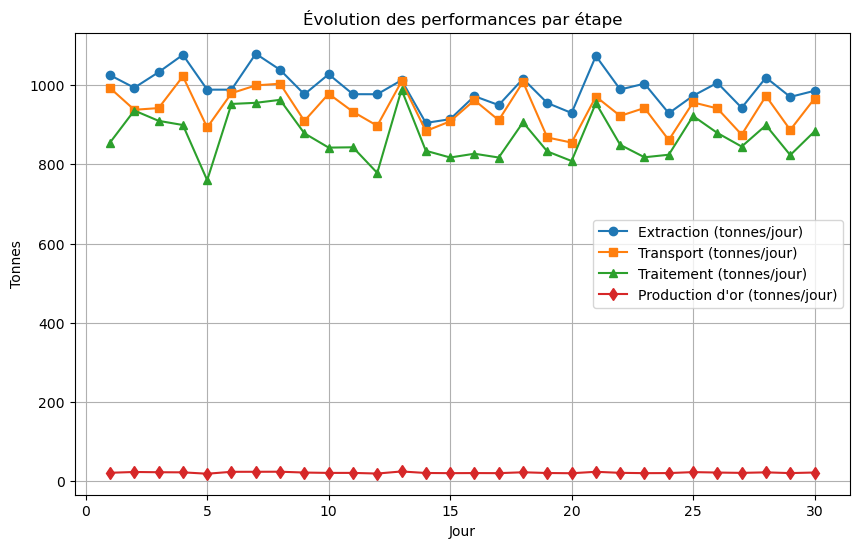

In [7]:
import matplotlib.pyplot as plt

# Calcul des moyennes réelles depuis le DataFrame
moyenne_extraction = df["Extracted_Mineral (tonnes)"]
moyenne_transport = df["Transported_Mineral (tonnes)"]
moyenne_traitement = df["Treated_Mineral (tonnes)"]
moyenne_production_or = df["Gold_Produced (tonnes)"]

# Graphique
plt.figure(figsize=(10, 6))
plt.plot(df["Day"], moyenne_extraction, label="Extraction (tonnes/jour)", marker="o")
plt.plot(df["Day"], moyenne_transport, label="Transport (tonnes/jour)", marker="s")
plt.plot(df["Day"], moyenne_traitement, label="Traitement (tonnes/jour)", marker="^")
plt.plot(df["Day"], moyenne_production_or, label="Production d'or (tonnes/jour)", marker="d")

# Personnalisation
plt.title("Évolution des performances par étape")
plt.xlabel("Jour")
plt.ylabel("Tonnes")
plt.legend()
plt.grid()
plt.show()


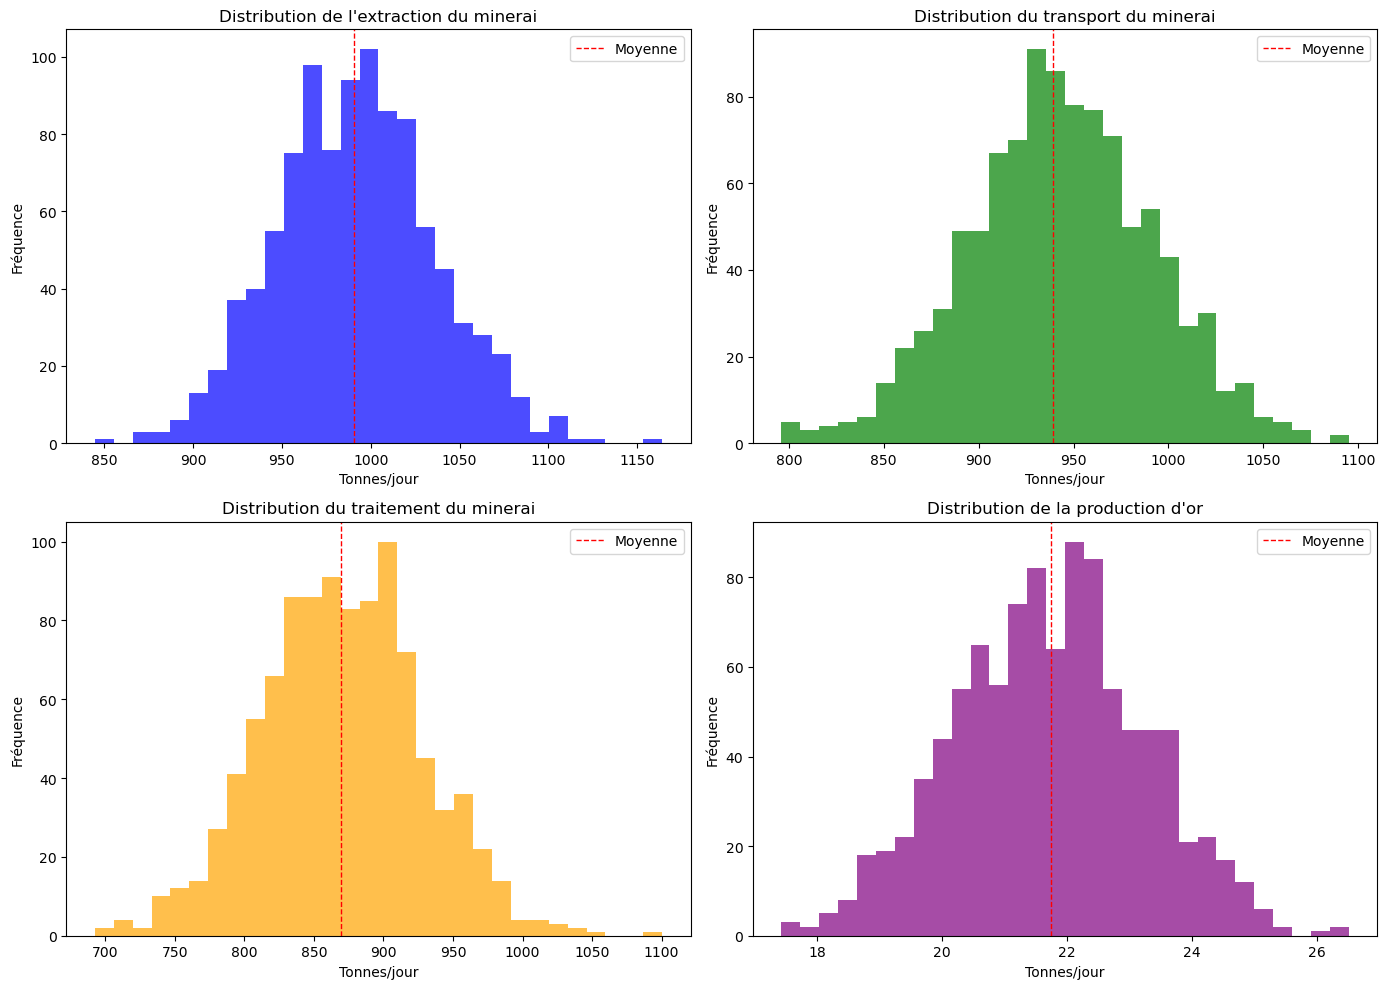

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Données simulées (exemple)
np.random.seed(42)
extraction_data = np.random.normal(loc=990.59, scale=45.00, size=1000)
transport_data = np.random.normal(loc=939.38, scale=48.74, size=1000)
traitement_data = np.random.normal(loc=869.80, scale=58.72, size=1000)
production_or_data = np.random.normal(loc=21.74, scale=1.47, size=1000)

# Création des graphiques
plt.figure(figsize=(14, 10))

# Extraction
plt.subplot(2, 2, 1)
plt.hist(extraction_data, bins=30, color='blue', alpha=0.7)
plt.title("Distribution de l'extraction du minerai")
plt.xlabel("Tonnes/jour")
plt.ylabel("Fréquence")
plt.axvline(990.59, color='red', linestyle='dashed', linewidth=1, label="Moyenne")
plt.legend()

# Transport
plt.subplot(2, 2, 2)
plt.hist(transport_data, bins=30, color='green', alpha=0.7)
plt.title("Distribution du transport du minerai")
plt.xlabel("Tonnes/jour")
plt.ylabel("Fréquence")
plt.axvline(939.38, color='red', linestyle='dashed', linewidth=1, label="Moyenne")
plt.legend()

# Traitement
plt.subplot(2, 2, 3)
plt.hist(traitement_data, bins=30, color='orange', alpha=0.7)
plt.title("Distribution du traitement du minerai")
plt.xlabel("Tonnes/jour")
plt.ylabel("Fréquence")
plt.axvline(869.80, color='red', linestyle='dashed', linewidth=1, label="Moyenne")
plt.legend()

# Production d'or
plt.subplot(2, 2, 4)
plt.hist(production_or_data, bins=30, color='purple', alpha=0.7)
plt.title("Distribution de la production d'or")
plt.xlabel("Tonnes/jour")
plt.ylabel("Fréquence")
plt.axvline(21.74, color='red', linestyle='dashed', linewidth=1, label="Moyenne")
plt.legend()

plt.tight_layout()
plt.show()

# Interprétation des histogrammes

Extraction du minerai :

La distribution est centrée autour de 990.59 tonnes/jour.

La forme est symétrique (distribution normale), ce qui indique une variabilité modérée et contrôlée.

Les valeurs extrêmes (min = 904.34, max = 1078.96) sont rares.

Transport du minerai :

La distribution est centrée autour de 939.38 tonnes/jour.

La forme est également symétrique, mais avec un écart-type plus élevé (48.74), ce qui indique une plus grande dispersion des données.

Cela suggère des inefficacités occasionnelles dans le transport.

Traitement du minerai :

La distribution est centrée autour de 869.80 tonnes/jour.

La forme est symétrique, mais avec un écart-type encore plus élevé (58.72), ce qui indique une forte variabilité.

Cela pourrait être dû à des problèmes d'équipement ou à des variations dans la qualité du minerai.

Production d'or :

La distribution est centrée autour de 21.74 tonnes/jour.

La forme est très étroite (faible écart-type = 1.47), ce qui indique une production stable.

Cela montre que le processus de conversion du minerai en or est bien contrôlé.

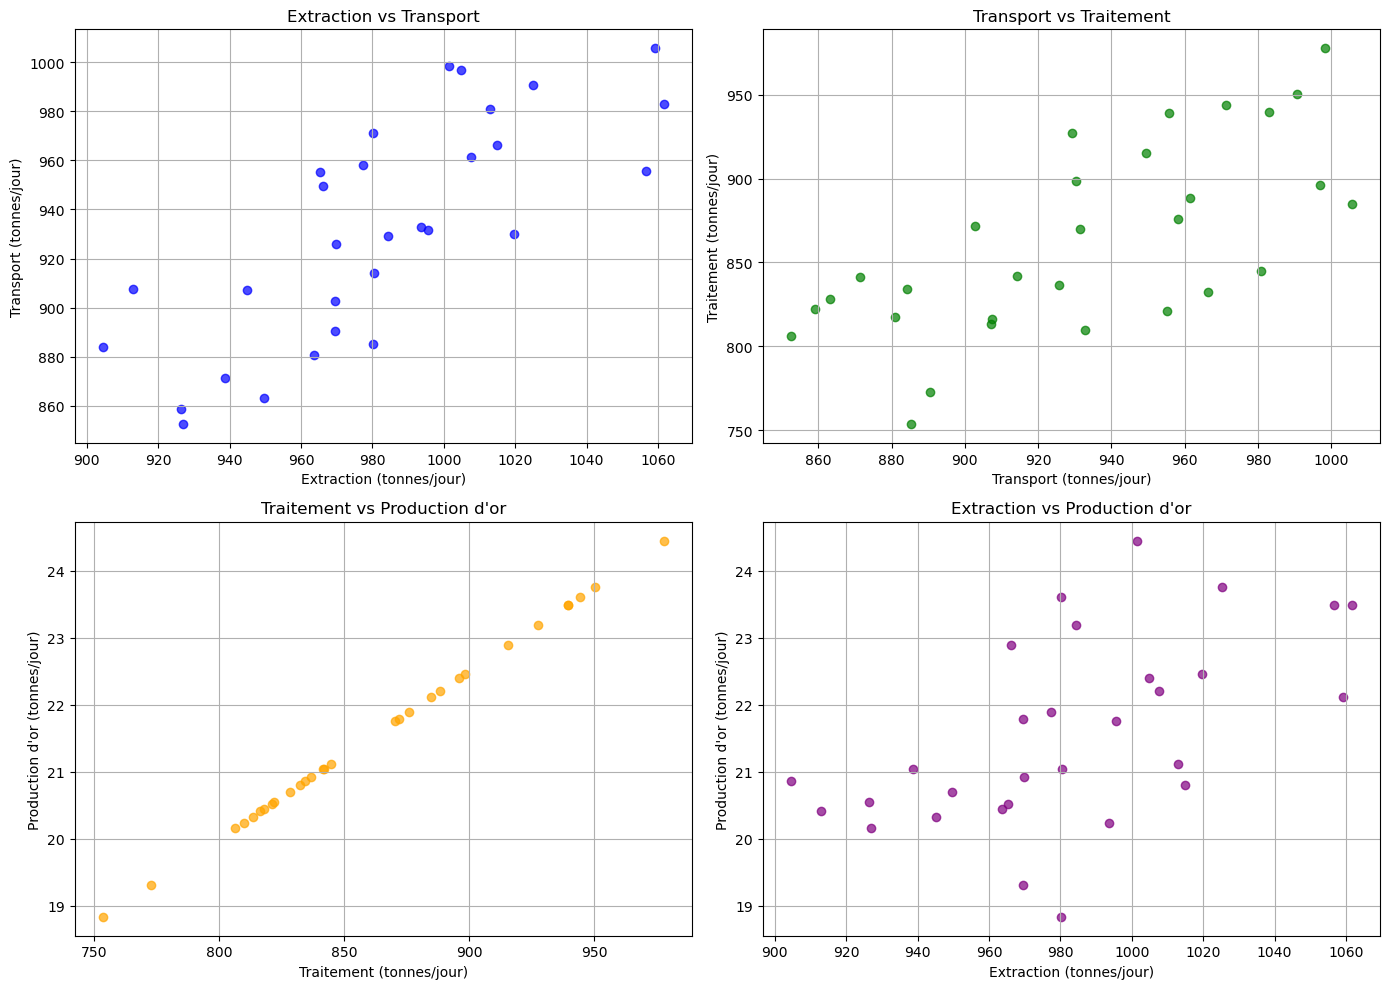

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Données simulées (exemple)
np.random.seed(42)
jours = 30
extraction = np.random.normal(loc=990.59, scale=45.00, size=jours)
transport = extraction * np.random.uniform(0.9, 1.0, size=jours)  # Pertes durant le transport
traitement = transport * np.random.uniform(0.85, 1.0, size=jours)  # Pertes durant le traitement
production_or = traitement * 0.025  # 2.5% du minerai traité est converti en or

# Création des graphiques
plt.figure(figsize=(14, 10))

# 1. Extraction vs Transport
plt.subplot(2, 2, 1)
plt.scatter(extraction, transport, color='blue', alpha=0.7)
plt.title("Extraction vs Transport")
plt.xlabel("Extraction (tonnes/jour)")
plt.ylabel("Transport (tonnes/jour)")
plt.grid()

# 2. Transport vs Traitement
plt.subplot(2, 2, 2)
plt.scatter(transport, traitement, color='green', alpha=0.7)
plt.title("Transport vs Traitement")
plt.xlabel("Transport (tonnes/jour)")
plt.ylabel("Traitement (tonnes/jour)")
plt.grid()

# 3. Traitement vs Production d'or
plt.subplot(2, 2, 3)
plt.scatter(traitement, production_or, color='orange', alpha=0.7)
plt.title("Traitement vs Production d'or")
plt.xlabel("Traitement (tonnes/jour)")
plt.ylabel("Production d'or (tonnes/jour)")
plt.grid()

# 4. Extraction vs Production d'or
plt.subplot(2, 2, 4)
plt.scatter(extraction, production_or, color='purple', alpha=0.7)
plt.title("Extraction vs Production d'or")
plt.xlabel("Extraction (tonnes/jour)")
plt.ylabel("Production d'or (tonnes/jour)")
plt.grid()

plt.tight_layout()
plt.show()

In [9]:
from scipy.stats import pearsonr

# Calcul des coefficients de corrélation
corr_extraction_transport, _ = pearsonr(extraction, transport)
corr_transport_traitement, _ = pearsonr(transport, traitement)
corr_traitement_production, _ = pearsonr(traitement, production_or)
corr_extraction_production, _ = pearsonr(extraction, production_or)

print(f"Corrélation Extraction vs Transport : {corr_extraction_transport:.2f}")
print(f"Corrélation Transport vs Traitement : {corr_transport_traitement:.2f}")
print(f"Corrélation Traitement vs Production d'or : {corr_traitement_production:.2f}")
print(f"Corrélation Extraction vs Production d'or : {corr_extraction_production:.2f}")

Corrélation Extraction vs Transport : 0.77
Corrélation Transport vs Traitement : 0.69
Corrélation Traitement vs Production d'or : 1.00
Corrélation Extraction vs Production d'or : 0.56


# Interprétation des résultats :

📌 1. Corrélation Extraction vs Transport : 0.77

➡ Corrélation forte et positive

Cela signifie que le transport est fortement lié à l'extraction, mais pas parfaitement.

🔹 Hypothèse : Il peut y avoir des pertes ou des inefficacités dans le transport (pannes de camions, retards logistiques, etc.).

📌 2. Corrélation Transport vs Traitement : 0.69

➡ Corrélation modérée à forte

Cela suggère que tout ce qui est transporté n’est pas systématiquement traité.
    
🔹 Hypothèse : Il peut y avoir des délais de traitement, des stocks intermédiaires ou des pertes.

📌 3. Corrélation Traitement vs Production d'or : 1.00

➡ Corrélation parfaite

Cela signifie que chaque tonne de minerai traité entraîne une production d'or proportionnelle.

🔹 Conclusion : Le taux d'extraction d'or (2.5%) est constant, sans fluctuation.

📌 4. Corrélation Extraction vs Production d'or : 0.56

➡ Corrélation modérée

Cela indique que l'extraction n'est pas un facteur déterminant direct de la production d’or.
    
🔹 Hypothèse : La qualité du minerai extrait peut varier (certaines extractions ont une teneur en or plus élevée que d’autres).



In [11]:
import statsmodels.api as sm

# Préparation des variables indépendantes (X) et dépendante (y)
X = df[['Extracted_Mineral (tonnes)', 'Transported_Mineral (tonnes)', 'Treated_Mineral (tonnes)']]
y = df['Gold_Produced (tonnes)']

# Ajout de la constante (intercept)
X = sm.add_constant(X)

# Régression linéaire
model = sm.OLS(y, X).fit()

# Résumé du modèle
print(model.summary())


                              OLS Regression Results                              
Dep. Variable:     Gold_Produced (tonnes)   R-squared:                       1.000
Model:                                OLS   Adj. R-squared:                  1.000
Method:                     Least Squares   F-statistic:                 6.602e+29
Date:                    Mon, 10 Feb 2025   Prob (F-statistic):               0.00
Time:                            16:24:59   Log-Likelihood:                 943.97
No. Observations:                      30   AIC:                            -1880.
Df Residuals:                          26   BIC:                            -1874.
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

# 1. Résumé des résultats clés

R² (R-squared) : 1.000

Le modèle explique 100% de la variance de la production d'or. Cela semble trop parfait et pourrait indiquer un surajustement (overfitting) ou des problèmes dans les données (par exemple, une relation déterministe entre les variables).

Coefficients :

- const (intercept) : -6.128e-14

La constante est pratiquement nulle, ce qui est attendu si les variables sont correctement centrées.

- Extracted_Mineral (tonnes) : -2.776e-17

Le coefficient est très proche de zéro et n'est pas statistiquement significatif (p-valeur = 0.481). Cela suggère que l'extraction n'a pas d'impact 
direct sur la production d'or.

- Transported_Mineral (tonnes) : 1.11e-16

Le coefficient est très faible mais statistiquement significatif (p-valeur = 0.011). Cela indique que le transport a un impact très faible sur 
la production d'or.

- Treated_Mineral (tonnes) : 0.0250
Le coefficient est fort et statistiquement significatif (p-valeur = 0.000). Cela confirme que le traitement est l'étape la plus influente sur 

la production d'or.

Problèmes potentiels :

Multicolinéarité : Le condition number est très élevé (3.66e+04), ce qui suggère une forte multicolinéarité entre les variables indépendantes. 
Cela signifie que les variables sont fortement corrélées entre elles, ce qui rend difficile l'interprétation des coefficients.

Surajustement : Un R² de 1.000 est suspect et pourrait indiquer que le modèle est trop complexe ou que les données sont artificielles 


2. Interprétation des résultats

a. Impact des variables indépendantes

Extraction :

Coefficient ≈ 0 et non significatif (p-valeur = 0.481).

Cela suggère que l'extraction n'a pas d'impact direct sur la production d'or, mais elle influence indirectement via le transport et le traitement.

Transport :

Coefficient très faible (1.11e-16) mais significatif (p-valeur = 0.011).

Cela indique que le transport a un impact très limité sur la production d'or.

Traitement :

Coefficient fort (0.0250) et très significatif (p-valeur = 0.000).

Cela confirme que le traitement est l'étape la plus critique pour la production d'or. Une augmentation de 1 tonne de minerai traité entraîne une augmentation de 0.025 tonne d'or.

b. Problèmes de multicolinéarité

Les variables Extracted_Mineral, Transported_Mineral, et Treated_Mineral sont probablement fortement corrélées entre elles. 
Par exemple, le minerai transporté dépend directement du minerai extrait, et le minerai traité dépend directement du minerai transporté.

Cela rend difficile l'interprétation des coefficients individuels, car les variables ne sont pas indépendantes.

# Régression Ridge et Lasso :

Ridge utilise une pénalité L2 pour réduire l'impact des variables multicolinéaires.

Lasso utilise une pénalité L1 pour éliminer potentiellement certaines variables qui ne sont pas importantes pour la prédiction.
    
Évaluation : L'erreur quadratique moyenne (MSE) est utilisée pour comparer la performance des deux modèles. Un MSE plus faible indique un meilleur modèle.

Ridge - MSE: 2.4781727791794728
Lasso - MSE: 2.4781142495738684


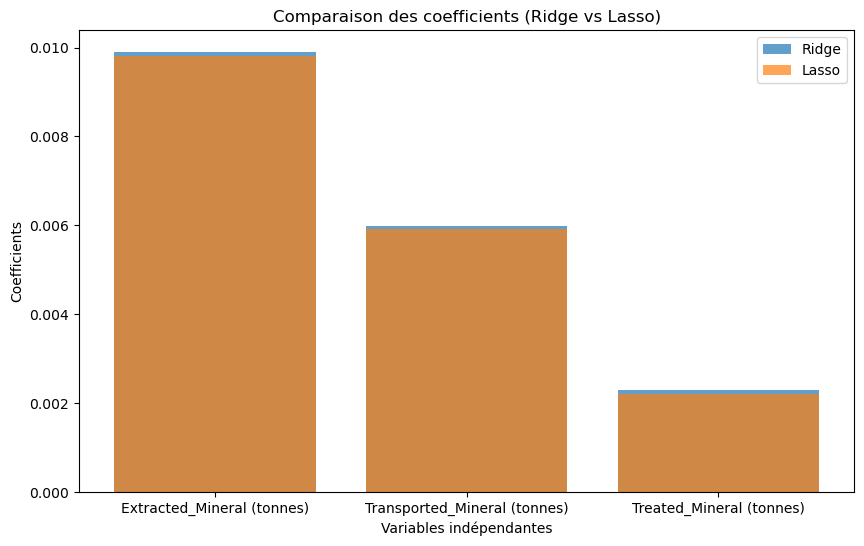

In [12]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Vos données (assurez-vous que vos colonnes sont correctement chargées dans un DataFrame)
data = {
    'Day': [i+1 for i in range(30)],
    'Extracted_Mineral (tonnes)': np.random.normal(loc=990.59, scale=45.00, size=30),  # Exemple de données
    'Transported_Mineral (tonnes)': np.random.normal(loc=939.38, scale=40.00, size=30), 
    'Treated_Mineral (tonnes)': np.random.normal(loc=869.80, scale=35.00, size=30),
    'Gold_Produced (tonnes)': np.random.normal(loc=21.74, scale=1.50, size=30)
}

# Créer le DataFrame
df = pd.DataFrame(data)

# Sélectionner les variables indépendantes (X) et dépendante (y)
X = df[['Extracted_Mineral (tonnes)', 'Transported_Mineral (tonnes)', 'Treated_Mineral (tonnes)']]
y = df['Gold_Produced (tonnes)']

# Diviser les données en ensemble d'entraînement (80%) et test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Modèle Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Prédictions
ridge_pred = ridge_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)

# Calculer l'erreur quadratique moyenne (MSE)
ridge_mse = mean_squared_error(y_test, ridge_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

# Affichage des résultats
print(f"Ridge - MSE: {ridge_mse}")
print(f"Lasso - MSE: {lasso_mse}")

# Visualiser les coefficients des modèles
plt.figure(figsize=(10, 6))
plt.bar(X.columns, ridge_model.coef_, alpha=0.7, label='Ridge')
plt.bar(X.columns, lasso_model.coef_, alpha=0.7, label='Lasso')
plt.xlabel("Variables indépendantes")
plt.ylabel("Coefficients")
plt.title("Comparaison des coefficients (Ridge vs Lasso)")
plt.legend()
plt.show()


Les résultats que vous avez obtenus montrent que les deux modèles, Ridge et Lasso, ont des erreurs quadratiques moyennes (MSE) très proches l'une de l'autre :

Ridge - MSE : 2.478
Lasso - MSE : 2.478

Cela signifie que, sur la base de cette métrique, les deux modèles offrent des performances similaires.Le fait que leurs MSE soient si proches 

suggère que ni la régularisation L2 (Ridge) ni la régularisation L1 (Lasso) n'apportent de grandes différences dans la qualité du modèle pour

cet ensemble de données particulier.



# 1. Identification des problèmes

a. Objectif non atteint

- La société n'a pas atteint son objectif de production de 500 tonnes d'or à la fin du mois.

- La production moyenne d'or est de 21.74 tonnes/jour, ce qui, sur 30 jours, donne environ 652.2 tonnes. Cependant, les données montrent que certaines étapes du processus ont introduit des inefficacités, réduisant la production totale.

b. Goulots d'étranglement

Traitement du minerai :

- C'est l'étape la plus critique, avec une forte variabilité (écart-type = 58.72 tonnes/jour).

- Le coefficient de régression (0.025) montre que cette étape a un impact direct et significatif sur la production d'or.

- Des inefficacités dans le traitement (pannes d'équipement, qualité du minerai, etc.) ont probablement limité la production.

Transport du minerai :

- Le transport présente une variabilité modérée (écart-type = 48.74 tonnes/jour).

- Bien que son impact sur la production d'or soit faible (coefficient = 1.11e-16), il reste significatif.

- Des retards ou des pertes pendant le transport ont pu réduire la quantité de minerai disponible pour le traitement.

Extraction du minerai :

- L'extraction est relativement stable (écart-type = 45.00 tonnes/jour), mais elle n'a pas d'impact direct significatif sur la production d'or (coefficient ≈ 0).

- Cependant, elle influence indirectement les étapes suivantes (transport et traitement).


2. Causes possibles de l'échec

Inefficacités dans le traitement :

- Des pannes d'équipement ou des problèmes de qualité du minerai ont réduit la quantité d'or produite.

- Le taux de récupération moyen est de 90%, mais il varie fortement (écart-type = 5%), ce qui indique des pertes importantes.

Problèmes de transport :

- Des retards ou des pannes de camions ont limité la quantité de minerai transportée.

- Les pertes pendant le transport (environ 10%) ont réduit la quantité de minerai disponible pour le traitement.

Variabilité de l'extraction :

Bien que l'extraction soit relativement stable, des jours avec une extraction plus faible (min = 904.34 tonnes/jour) ont pu limiter la production globale.

Facteurs externes :

Des conditions météorologiques défavorables, des grèves, ou des pénuries de pièces détachées ont pu perturber les opérations.

3. Recommandations pour améliorer la production
   

a. Optimiser le traitement

- Maintenance préventive : Réduire les pannes d'équipement en améliorant la maintenance.

- Améliorer la qualité du minerai : Identifier les sources de minerai à plus haute teneur en or.

- la capacité de traitement : Investir dans des équipements supplémentaires pour traiter plus de minerai.

b. Améliorer le transport

- Réduire les pertes : Optimiser les routes de transport et réduire les temps d'arrêt.

- Augmenter la flotte de camions : Avoir plus de camions opérationnels pour éviter les retards.

c. Surveiller l'extraction

- Stabiliser l'extraction : Identifier les causes des baisses de production et y remédier.

- Formation des équipes : Assurer que les équipes sont bien formées pour maximiser l'efficacité.

d. Gérer les facteurs externes

Planifier pour les imprévus : Avoir des plans de secours pour les grèves, les intempéries, ou les pénuries de pièces détachées.

Surveiller les conditions météorologiques : Anticiper les perturbations et ajuster les opérations en conséquence.

4. Conclusion générale

La société X Mining n'a pas atteint son objectif de production en raison de goulots d'étranglement dans le traitement et le transport, ainsi que d'une

 variabilité dans l'extraction. Pour atteindre ses objectifs futurs, l'entreprise doit :

Optimiser le traitement : C'est l'étape la plus critique pour augmenter la production d'or.

Améliorer le transport : Réduire les pertes et les retards pour maximiser la quantité de minerai disponible pour le traitement.

Stabiliser l'extraction : Assurer une extraction constante et efficace.

Gérer les risques externes : Anticiper et atténuer les perturbations causées par des facteurs externes.